Exercice 1 : 
 Dans cet exercice, nous allons travailler avec la base de données Iris. Cette base contient 
150 instances d’iris. L’objectif est de classer chaque instance en une des trois catégories : Iris 
setosa, Iris virginica ou Iris versicolor. 
Une des classes est linéairement séparable par rapport aux deux autres, mais les deux autres 
ne sont pas séparables une par rapport à l’autre. 
Les attributs du jeu de données sont : 
- longueur de sépale, 
- largeur de sépale, 
- longueur de pétale, 
- largeur de pétale, 
- classe : Iris Setosa, Iris Versicolor ou Iris Virginica.

In [2]:
# Imports
import pandas
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [3]:
# Chargement des données
iris = load_iris() 
X, Y = iris.data, iris.target

1- Calculer les statistiques (moyenne et écart-type) des quatre variables explicatives : 
longueur de sépale, largueur de sépale, longueur de pétale et largeur de pétale.

In [4]:
# Convertion en Dataframe
X_ls_col = ["sepal length", "sepal width", "petal length", "petal width"]
X_df = pandas.DataFrame(X, columns=X_ls_col)

# Calcul des moyennes et écart-types
for i in X_ls_col:
    print("Moyenne des " + i + " : " + str(X_df[i].mean()))
    print("Ecart type des " + i + " : " + str(X_df[i].std()))

Moyenne des sepal length : 5.843333333333334
Ecart type des sepal length : 0.828066127977863
Moyenne des sepal width : 3.0573333333333337
Ecart type des sepal width : 0.4358662849366982
Moyenne des petal length : 3.7580000000000005
Ecart type des petal length : 1.7652982332594662
Moyenne des petal width : 1.1993333333333336
Ecart type des petal width : 0.7622376689603465


2- Combien y a-t-il d’exemples de chaque classe ?

In [5]:
# Convertion en Dataframe
Y_df = pandas.DataFrame(Y, columns=["target"])

# Comptage des différentes valeurs
print(Y_df.value_counts())

target
0         50
1         50
2         50
dtype: int64


Il existe donc 50 exemples pour chaque classe

3- Décomposer votre jeu de données en 70% pour l’apprentissage, 30% pour le test 

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.7, test_size=0.3, random_state=0)

4- Construire votre arbre de décision

In [7]:
# Instanciation de l'arbre
Tree = DecisionTreeClassifier()

# Construction de l'arbre
Tree.fit(X = X_train, y = Y_train)

DecisionTreeClassifier()

5- Visualiser votre arbre de décision

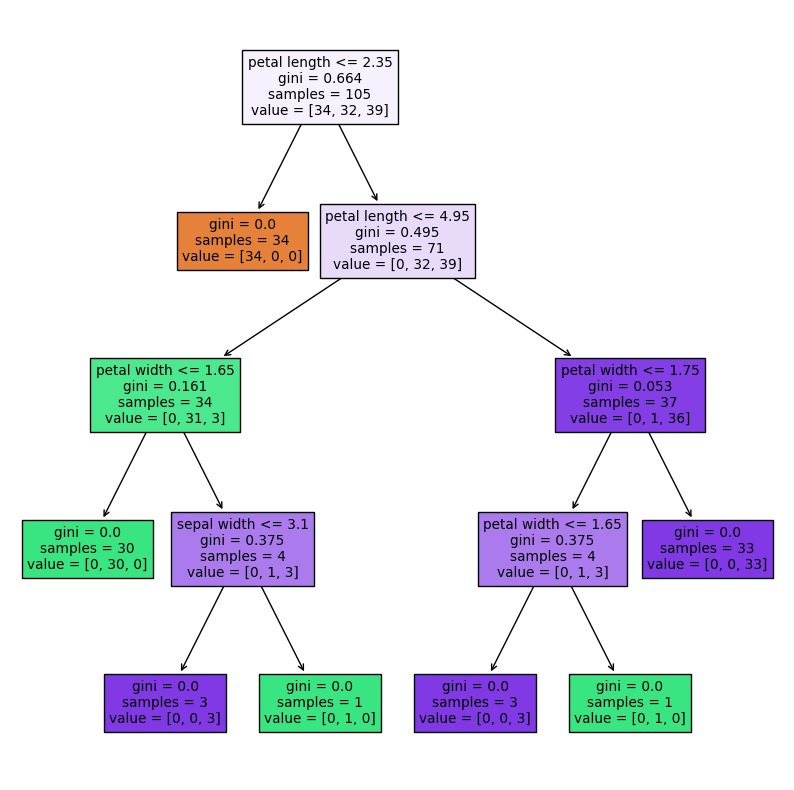

In [8]:
plt.figure(figsize=(10,10))
plot_tree(Tree,feature_names = X_ls_col,filled=True)
plt.show()

6- Utiliser le modèle pour la prédiction du jeu test

In [9]:
# Prédiction sur l'échantillon test
Y_pred = Tree.predict(X=X_test)
print(Y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


7- Calculer le score

In [10]:
print(Tree.score(X_test, Y_test))
print(metrics.confusion_matrix(Y_test,Y_pred))

0.9777777777777777
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


8- Changez les valeurs des paramètres max_depth et min_samples_leaf. Que constatez-vous ?

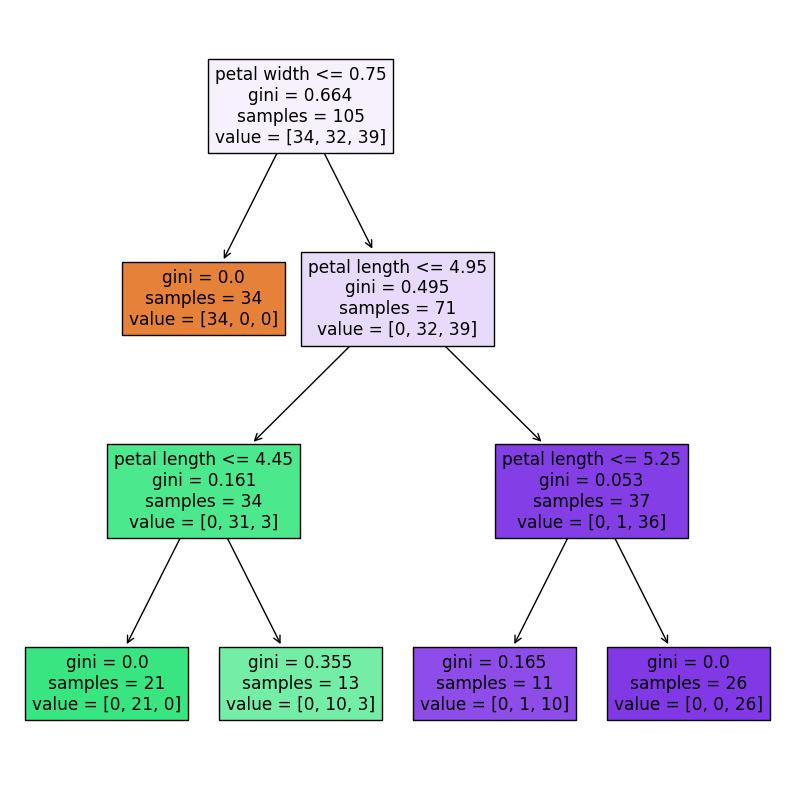

0.9111111111111111


In [11]:
# Instanciation de l'arbre
Tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

# Construction de l'arbre
Tree.fit(X = X_train, y = Y_train)

plt.figure(figsize=(10,10))
plot_tree(Tree,feature_names = X_ls_col,filled=True)
plt.show()

print(Tree.score(X_test, Y_test))

On constate que le score est moins bon car nous avons limité le nombre de couches maximale ainsi que le nombre minimal d'échantillons par noeud final.

9- Le problème ici étant particulièrement simple, refaites une division 
apprentissage/test avec 5% des données en apprentissage et 95% test.

    a. Calculez le taux d’éléments mal classifiés sur l’ensemble de test.

    b. Faites varier (ou mieux, réalisez une recherche par grille avec GridSearchCV) les valeurs des paramètres max_depth et min_samples_leaf pour mesurer leur impact sur ce score. 

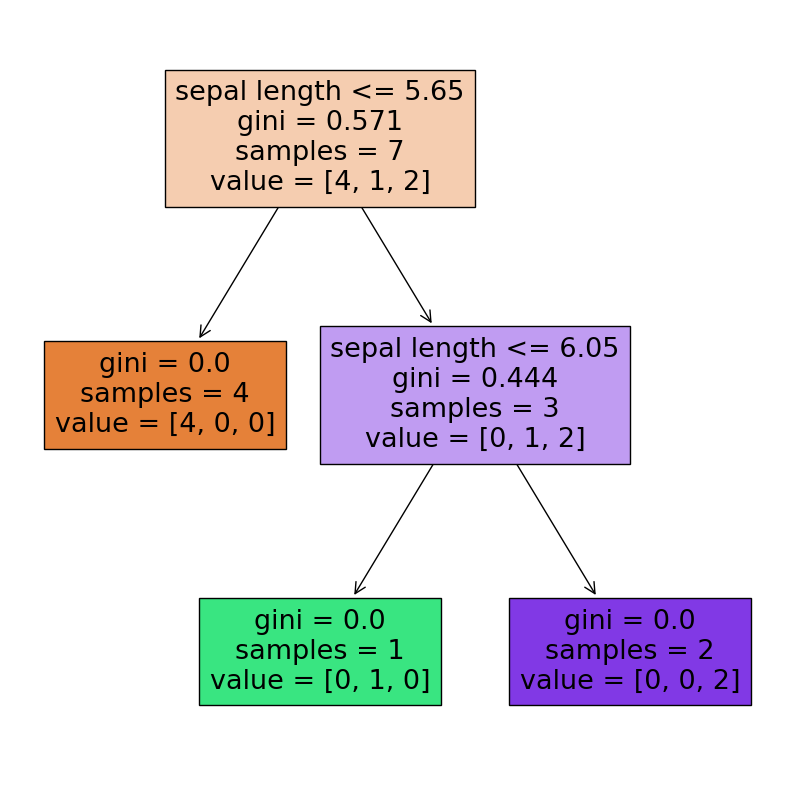

0.6643356643356644


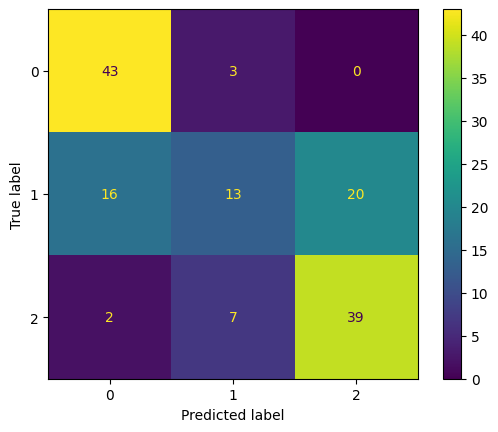

In [12]:
# Instanciation de l'arbre
Tree = DecisionTreeClassifier()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.05, test_size=0.95, random_state=0)

# Construction de l'arbre
Tree.fit(X = X_train, y = Y_train)

plt.figure(figsize=(10,10))
plot_tree(Tree,feature_names = X_ls_col,filled=True)
plt.show()

Y_pred = Tree.predict(X=X_test)

print(Tree.score(X_test, Y_test))

metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(Y_test,Y_pred)).plot()

c:\Users\arthu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


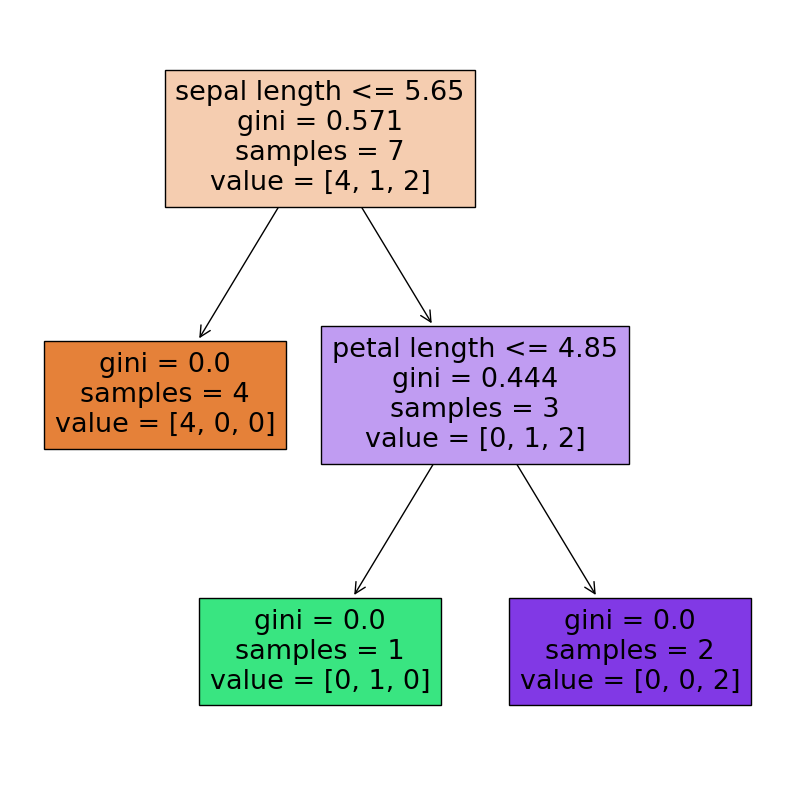

0.8111888111888111


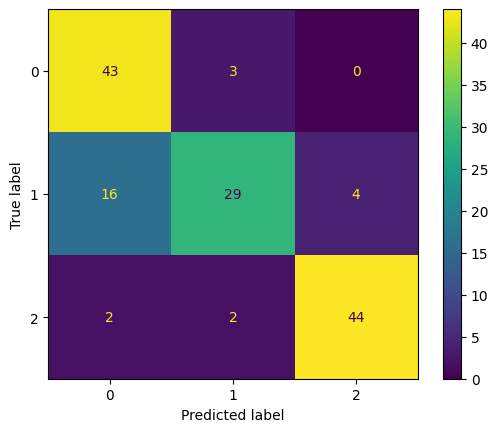

In [13]:
tree_para = {'criterion':['gini','entropy'],'max_depth':range(1,10),'min_samples_leaf':range(1,50)}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=2)
clf.fit(X_train, Y_train)

plt.figure(figsize=(10,10))
plot_tree(clf.best_estimator_,feature_names = X_ls_col,filled=True)
plt.show()

Y_pred = clf.predict(X=X_test)

print(clf.score(X_test, Y_test))

metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(Y_test,Y_pred)).plot()